In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association


%matplotlib inline

In [2]:
df_a = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [3]:
df_a

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


# **Crosstab Analysis:**

Create a crosstab between the product category and the isBestSeller status.


In [4]:
ct_result = pd.crosstab(df_a['category'], df_a['isBestSeller'])

ct_result = ct_result.sort_values(by=df_a['isBestSeller'][1], ascending=False).T


In [5]:
ct_result

category,Grocery,Health & Personal Care,Baby,Sports & Outdoors,Power & Hand Tools,Beauty,Pet Supplies,Arts & Crafts,Women,Men,...,External TV Tuners & Video Capture Cards,Ski Helmets,External Sound Cards,Monitors,Motherboards,Downhill Ski Boots,Digital Frames,Motorbike Chassis,Motorbike Drive & Gears,eBook Readers & Accessories
isBestSeller,,,,,,,,,,,,,,,,,,,,,
False,9008,9017,14709,835935,8353,19010,9152,9319,17559,17248,...,2738,254,5650,8565,259,1284,774,107,250,246
True,556,552,341,330,306,302,285,230,213,169,...,0,0,0,0,0,0,0,0,0,0


From looking at the cross table we see that there are categories where being a bestseller is prevalent 

**Are there categories where being a best-seller is more prevalent?**

Yes there are categories where being a best seller is more prevalent

**Hint:** one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

# **Statistical Tests:**

**Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.**

**Notes:**
- The chi-square test is a statistical test used to **determine whether there is a significant association between two categorical variables**. 
- Interpretation: if p-value < 0.05, this suggests that there is a significant association between the categorical variables. P-value >= 0.05, indicates that there is not enough evidence to conclude a significant association between the variables. 

In [6]:
c2_stat, c2_pv, _, _ = chi2_contingency(ct_result)

In [7]:
c2_stat, c2_pv

(36540.20270061387, 0.0)

From looking at the P-value we see its 0.0, I think this means that there is a signficant association between category and 'isBestSeller'.

**Compute Cramér's V to understand the strength of association between best-seller status and category.**

**Notes:**
- Cramer's V is a measure of association used to **quantify the strength of the relationship between categorical variables**. 
- Interpretation: Cramer's V ranges from 0 to 1, where **0 indicates no association, and 1 represents a perfect association between the variables**. A higher value of Cramer's V indicates a stronger relationship between the categorical variables.

In [8]:
association(ct_result, method="cramer")

0.1222829439760564

From the Cramer's V-value we see that even though there is a statistically significance, the strength of the relationship is not very string in practical terms.

# **Visualizations:**

**Visualize the relationship between product categories and the best-seller status using a stacked bar chart.**

<Axes: xlabel='isBestSeller'>

<Figure size 1200x600 with 0 Axes>

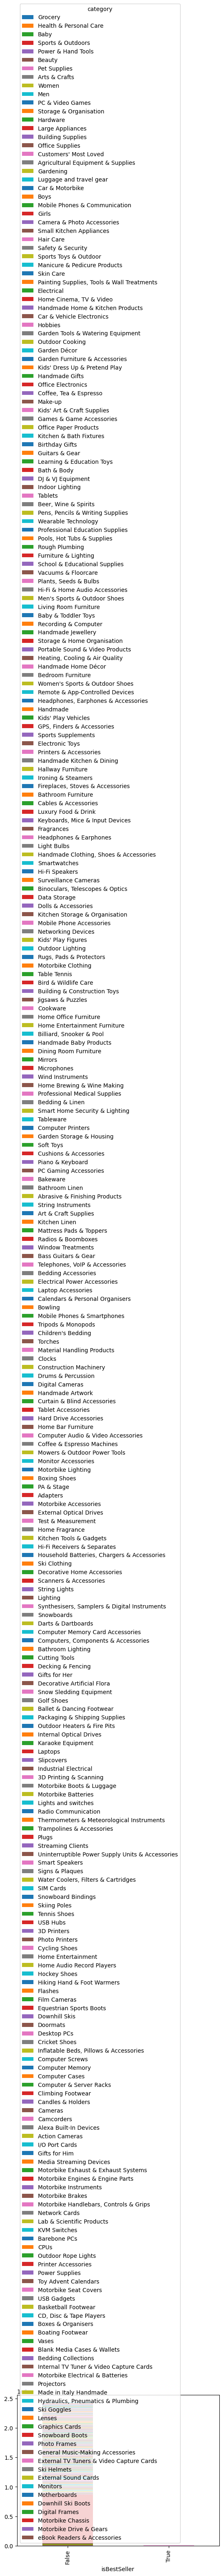

In [21]:
plt.figure(figsize=(12, 6))
ct_result.plot(kind="bar", stacked=True)

# **Part 2:** Exploring Product Prices and Ratings Across Categories and Brands

**Objective:** Investigate how different product categories influence product prices.

**Preliminary Step:** Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

In [10]:
df_a.describe().T

,count,mean,std,min,25%,50%,75%,max
uid,2443651.0,1.370545e+06,816056.169852,1.0,658921.50,1349029.00,2060685.50,2828593.0
stars,2443651.0,2.152836e+00,2.194865,0.0,0.00,0.00,4.40,5.0
reviews,2443651.0,4.806278e+02,5944.124151,0.0,0.00,0.00,59.00,1356658.0
price,2443651.0,8.924381e+01,345.608862,0.0,9.99,19.09,45.99,100000.0
boughtInLastMonth,2443651.0,2.589699e+01,240.483727,0.0,0.00,0.00,0.00,50000.0


**Step 1:** Calculate the Interquartile Range (IQR)

In [11]:
Q1 = np.percentile(df_a['price'], 25)
Q3 = np.percentile(df_a['price'], 75)

IQR = Q3 - Q1

**Step 2:** Calculate the lower and upper bounds

In [12]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

**Step 3:** Identify outliers

In [13]:
mask = (df_a['price'] < lower_bound) | (df_a['price'] > upper_bound)

**Step 4:** Remove outliers

In [14]:
df_a_no_o = df_a[~mask]

In [15]:
df_a_no_o

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


**Hint:** you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

**Violin Plots:**

Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
Which product category tends to have the highest median price? Don't filter here by top categories.

**Step 1:** Filter the top 20 categories by count

In [16]:
t_c = df_a_no_o['category'].value_counts().head(20)

**Step 2:** Filter the original DataFrame to include only the top 20 categories

In [17]:
df_a_o_tc = df_a_no_o[df_a_no_o['category'].isin(t_c.index)]

**Step 3:** Create a violin plot to visualize the distribution of price across categories

Text(0, 0.5, 'Price')

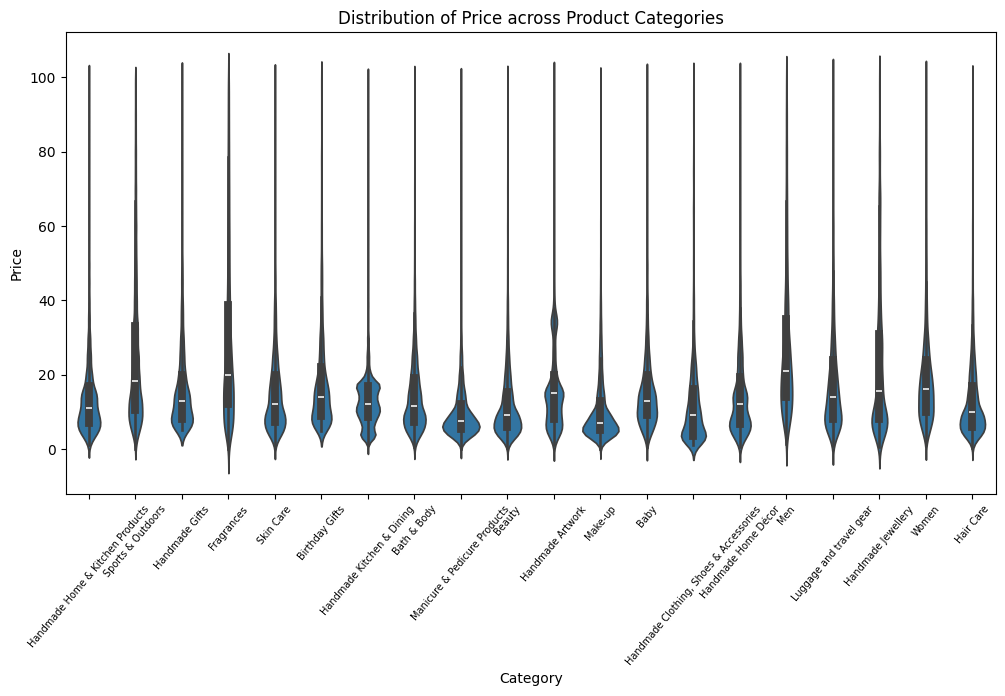

In [20]:
plt.figure(figsize=(12, 6))
sns.violinplot(x="category", y="price", data=df_a_o_tc)
plt.xticks(rotation=50)
plt.xticks(fontsize=7) 
plt.title("Distribution of Price across Product Categories")
plt.xlabel("Category")
plt.ylabel("Price")

**Step 4:** Identify the category with the highest median price (without filtering)

In [47]:
median_prices = df_a_o_tc.groupby('category')['price'].median()
highest_median_category = median_prices.idxmax()
print(f"The category with the highest median price is: {highest_median_category}")

The category with the highest median price is: Men


**Bar Charts:**

Create a bar chart comparing the average price of products for the top 10 product categories (based on count).

In [22]:
t_c_10 = df_a_no_o['category'].value_counts().head(10)

In [23]:
df_a_o_tc_10 = df_a_no_o[df_a_no_o['category'].isin(t_c_10.index)]

In [26]:
avg_prices = df_a_o_tc_10.groupby('category')['price'].mean()

In [31]:
avg_prices

category
Bath & Body                               14.678683
Beauty                                    12.523480
Birthday Gifts                            18.600195
Hair Care                                 13.461408
Handmade Clothing, Shoes & Accessories    12.958639
Handmade Gifts                            17.395112
Make-up                                   10.612918
Manicure & Pedicure Products              10.231825
Skin Care                                 15.654722
Sports & Outdoors                         25.172065
Name: price, dtype: float64

Text(0, 0.5, 'Average Price')

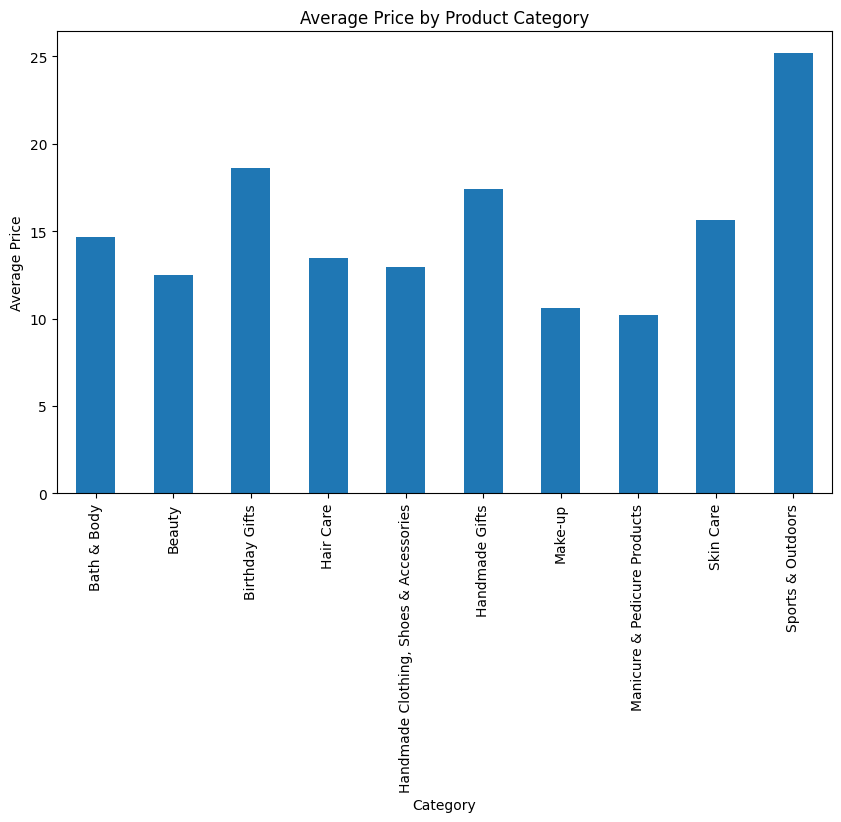

In [30]:
avg_prices.plot(kind='bar', figsize=(10, 6))
plt.title("Average Price by Product Category")
plt.xlabel("Category")
plt.ylabel("Average Price")

Which product category commands the highest average price? Don't filter here by top categories.

**Box Plots:**

Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [33]:
median = df_a_o_tc_10.groupby('category')['price'].median()

Text(0, 0.5, 'Price')

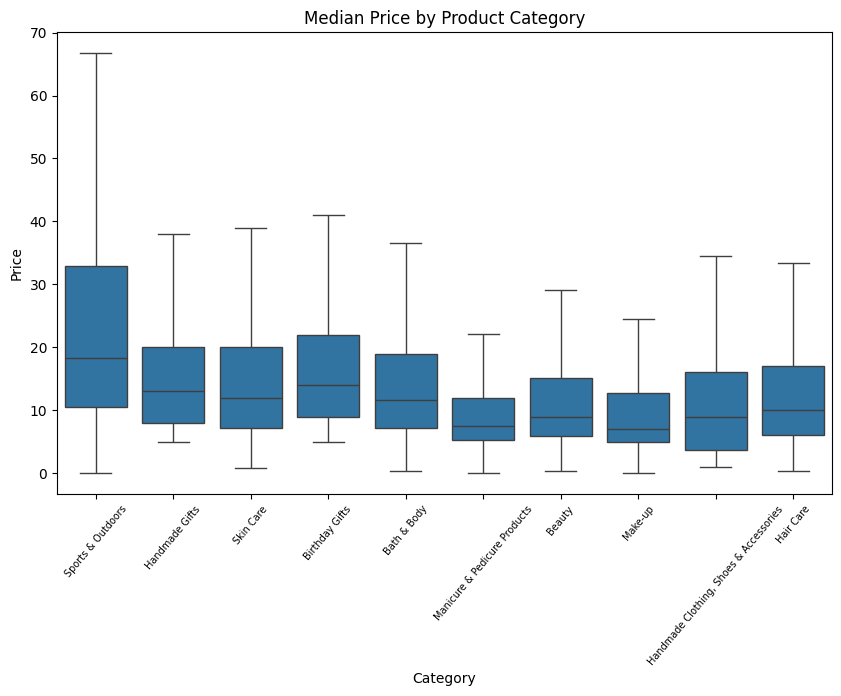

In [36]:
df_top_categories = df_a_no_o[df_a_no_o['category'].isin(t_c_10.index)]

# Create a box plot for the median of prices based on category
plt.figure(figsize=(10, 6))
sns.boxplot(x="category", y="price", data=df_top_categories, showfliers=False)
plt.xticks(rotation=50)
plt.xticks(fontsize=7) 
plt.title("Median Price by Product Category")
plt.xlabel("Category")
plt.ylabel("Price")

# **Part 3:** Investigating the Interplay Between Product Prices and Ratings

**Objective:** Analyze how product ratings (stars) correlate with product prices.

**Correlation Coefficients:**

Calculate the correlation coefficient between price and stars.

In [37]:
cor = df_a_no_o['price'].corr(df_a_no_o['stars'])
cor

-0.0776729987818137

In [40]:
# with outliers

corr = df_a['price'].corr(df_a['stars'])
print(corr)

-0.1249067326214861


**Is there a significant correlation between product price and its rating?**

there is no strong positive linear relationship between the two. same thing for with the outliers

**Visualizations:**

Use a scatter plot to visualize the relationship between product rating and price. 

<Axes: xlabel='stars', ylabel='price'>

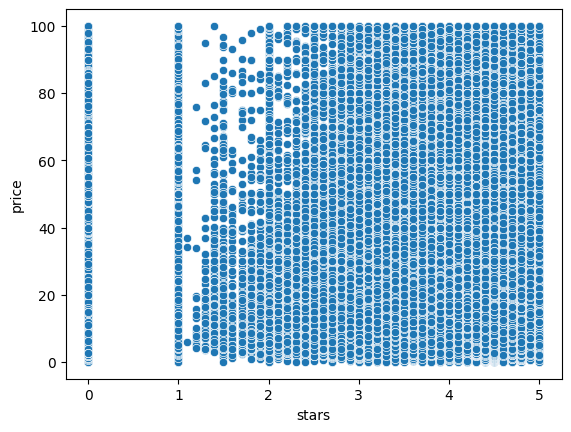

In [38]:
sns.scatterplot(data=df_a_no_o, x='stars', y='price')

<Axes: xlabel='stars', ylabel='price'>

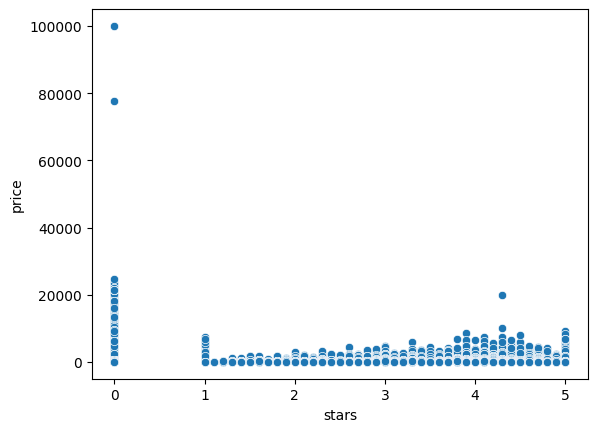

In [41]:
sns.scatterplot(data=df_a, x='stars', y='price')

**What patterns can you observe?**

I don't see a pattern, not many people rate a product between 0 and 1

Use a correlation heatmap to visualize correlations between all numerical variables.
Examine if product prices typically follow a normal distribution using a QQ plot.

In [42]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [43]:
numerical = ['uid', 'stars','reviews', 'price', 'boughtInLastMonth']

df_n = df_a[numerical]

df_n

,uid,stars,reviews,price,boughtInLastMonth
0,1,4.7,15308,21.99,0
1,2,4.7,98099,23.99,0
2,3,4.7,15308,21.99,0
3,4,4.7,7205,31.99,0
4,5,4.6,1881,17.99,0
...,...,...,...,...,...
2443646,2828589,0.0,0,22.34,0
2443647,2828590,0.0,0,97.99,0
2443648,2828591,0.0,0,52.99,0
2443649,2828592,4.3,404,79.99,0


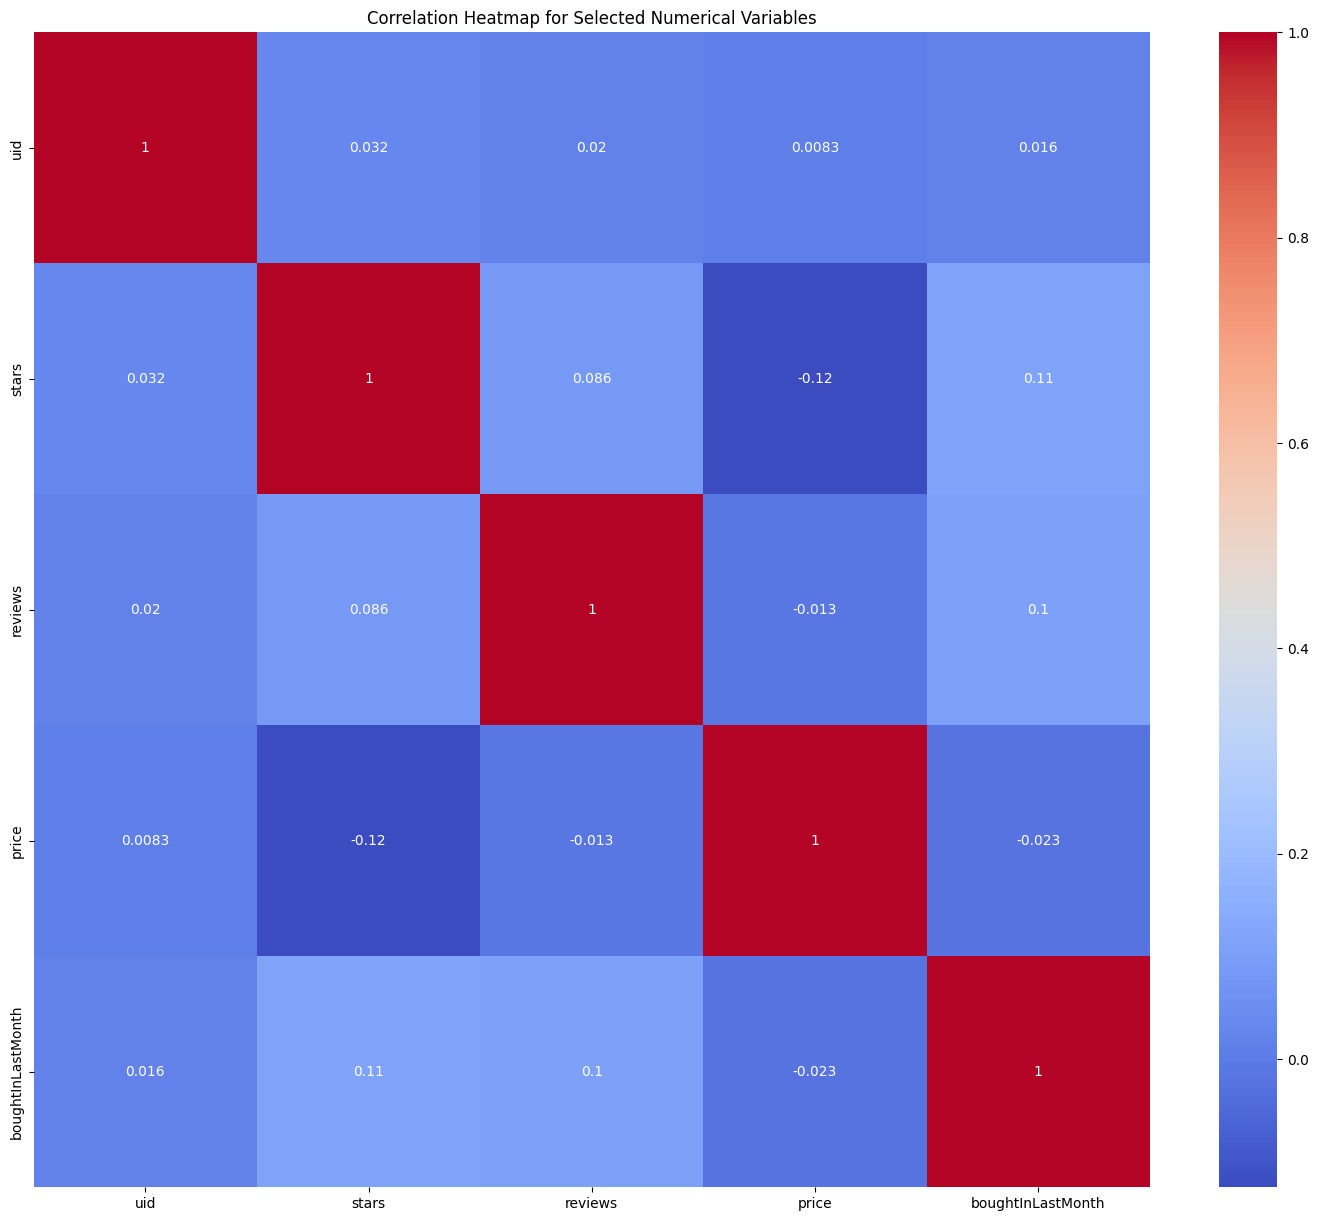

In [44]:
correlation_matrix = df_n.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

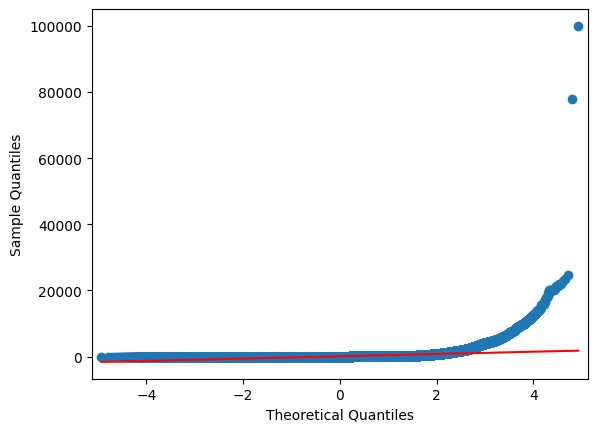

In [45]:
import statsmodels.api as sm

# Generating a Q-Q plot for 'SalePrice' to check if its distribution follows a normal distribution
sm.qqplot(df_a['price'], line='s');

This is not normally distributed, it appears to be right_skewed.